<a href="https://colab.research.google.com/github/SarahPendhari/CardioCare-heart-llm-qna/blob/main/RF_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 133, number of negative: 109
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 246
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.549587 -> initscore=0.199001
[LightGBM] [Info] Start training from score 0.199001
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

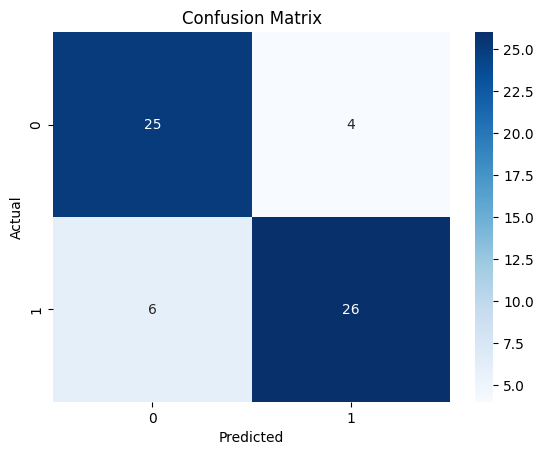

In [3]:
# Step 1: Install dependencies
!pip install lightgbm scikit-learn pandas matplotlib seaborn --quiet

# Step 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Load the dataset
df = pd.read_csv('/content/heart.csv')

# Step 4: Simulate risk categories
def map_target_to_risk(val):
    return 'High Risk' if val == 1 else 'Low Risk'

df['risk'] = df['target'].apply(map_target_to_risk)

# Optional: Convert to 3 classes if needed
# We'll use prediction probabilities later for risk scoring

# Step 5: Split features and target
X = df.drop(['target', 'risk'], axis=1)
y = df['target']

# Step 6: Handle missing values using imputer
imputer = SimpleImputer(strategy='median')

# Step 7: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: LightGBM classifier
model = Pipeline([
    ("imputer", imputer),
    ("scaler", StandardScaler()),  # optional, LightGBM doesn't need scaling
    ("clf", LGBMClassifier(random_state=42))
])

model.fit(X_train, y_train)

# Step 9: Predict probabilities and map to risk
probs = model.predict_proba(X_test)
preds = model.predict(X_test)

def get_risk_category(prob):
    if prob < 0.33:
        return "Low Risk"
    elif prob < 0.66:
        return "Moderate Risk"
    else:
        return "High Risk"

risk_scores = [get_risk_category(p[1]) for p in probs]

# Step 10: Display prediction results with probabilities
results = pd.DataFrame(X_test.copy())
results["Predicted_Prob"] = [p[1] for p in probs]
results["Predicted_Risk"] = risk_scores
results["Actual"] = y_test.values

print(results[["Predicted_Prob", "Predicted_Risk", "Actual"]].head(10))

# Step 11: Evaluation
print("\nClassification Report:\n", classification_report(y_test, preds))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [4]:
# Step 12: Simulate a test case with possibly missing values (as in OCR scenario)
test_input = pd.DataFrame([{
    'age': 58,
    'sex': 1,
    'cp': 2,
    'trestbps': np.nan,     # Missing due to OCR failure
    'chol': 230,
    'fbs': 0,
    'restecg': 1,
    'thalach': 165,
    'exang': 0,
    'oldpeak': 1.2,
    'slope': 2,
    'ca': 0,
    'thal': 2
}])

# Step 13: Predict using the trained pipeline
test_prob = model.predict_proba(test_input)[0][1]
test_pred = model.predict(test_input)[0]
test_risk = get_risk_category(test_prob)

# Step 14: Display result
print("\nTest Case Result:")
print(f"Predicted Class (0=Low Risk, 1=High Risk): {test_pred}")
print(f"Predicted Probability of Heart Disease: {round(test_prob, 3)}")
print(f"Predicted Risk Category: {test_risk}")



Test Case Result:
Predicted Class (0=Low Risk, 1=High Risk): 1
Predicted Probability of Heart Disease: 0.98
Predicted Risk Category: High Risk


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [5]:
import pickle

# Let's say your classifier is a RandomForest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
with open("rf_classifier.pkl", "wb") as f:
    pickle.dump(model, f)

In [8]:
import pickle
import numpy as np

# Load trained model
with open("rf_classifier.pkl", "rb") as f:
    classifier = pickle.load(f)

# Sample patient data (replace with actual input)
patient_data = {
    "age": 57,
    "sex": 1,
    "cp": 2,
    "trestbps": 140,
    "chol": 250,
    "fbs": 0,
    "restecg": 1,
    "thalach": 150,
    "exang": 0,
    "oldpeak": 1.4,
    "slope": 2,
    "ca": 0,
    "thal": 2
}

# Ensure feature order matches training
features = np.array([list(patient_data.values())]).reshape(1, -1)

# Get prediction
prediction = classifier.predict(features)[0]  # 0 = No Heart Disease, 1 = Likely Heart Disease

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [9]:
print(prediction)

1
